In [1]:
# Importation des nouvelles versions adaptées
from source.neutralspinsystem_1 import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy import empty, nan, savetxt


In [2]:
# Taille max pour stockage temporaire
MAX_FILE_SIZE = 100_000

# Chargement des paramètres de configuration
config_filename = "multising.conf"
config = read_config_file(config_filename)

# Extraction des paramètres
grid_height = int(config["grid_height"])
grid_width  = int(config["grid_width"])
alpha       = float(config["alpha"])
j           = float(config["j"])
total_updates = int(config["total_updates"])
init_up     = float(config["init_up"])
T           = float(config["T"])
beta        = 1/T

# Conversion des paramètres
reduced_alpha              = -2 * beta * alpha
reduced_neighbour_coupling = -2 * beta * j

# Stockage de la magnétisation
magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan

spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up,
    fraction_neutral=0.8,  # 10% d'agents neutres
    region_neutral="top_left"
)

In [3]:
# Initialisation de la liste des états de la grille
full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))

# Simulation des mises à jour du système
for ii in range(total_updates):
    # Mise à jour du système
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    # Sauvegarde périodique
    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

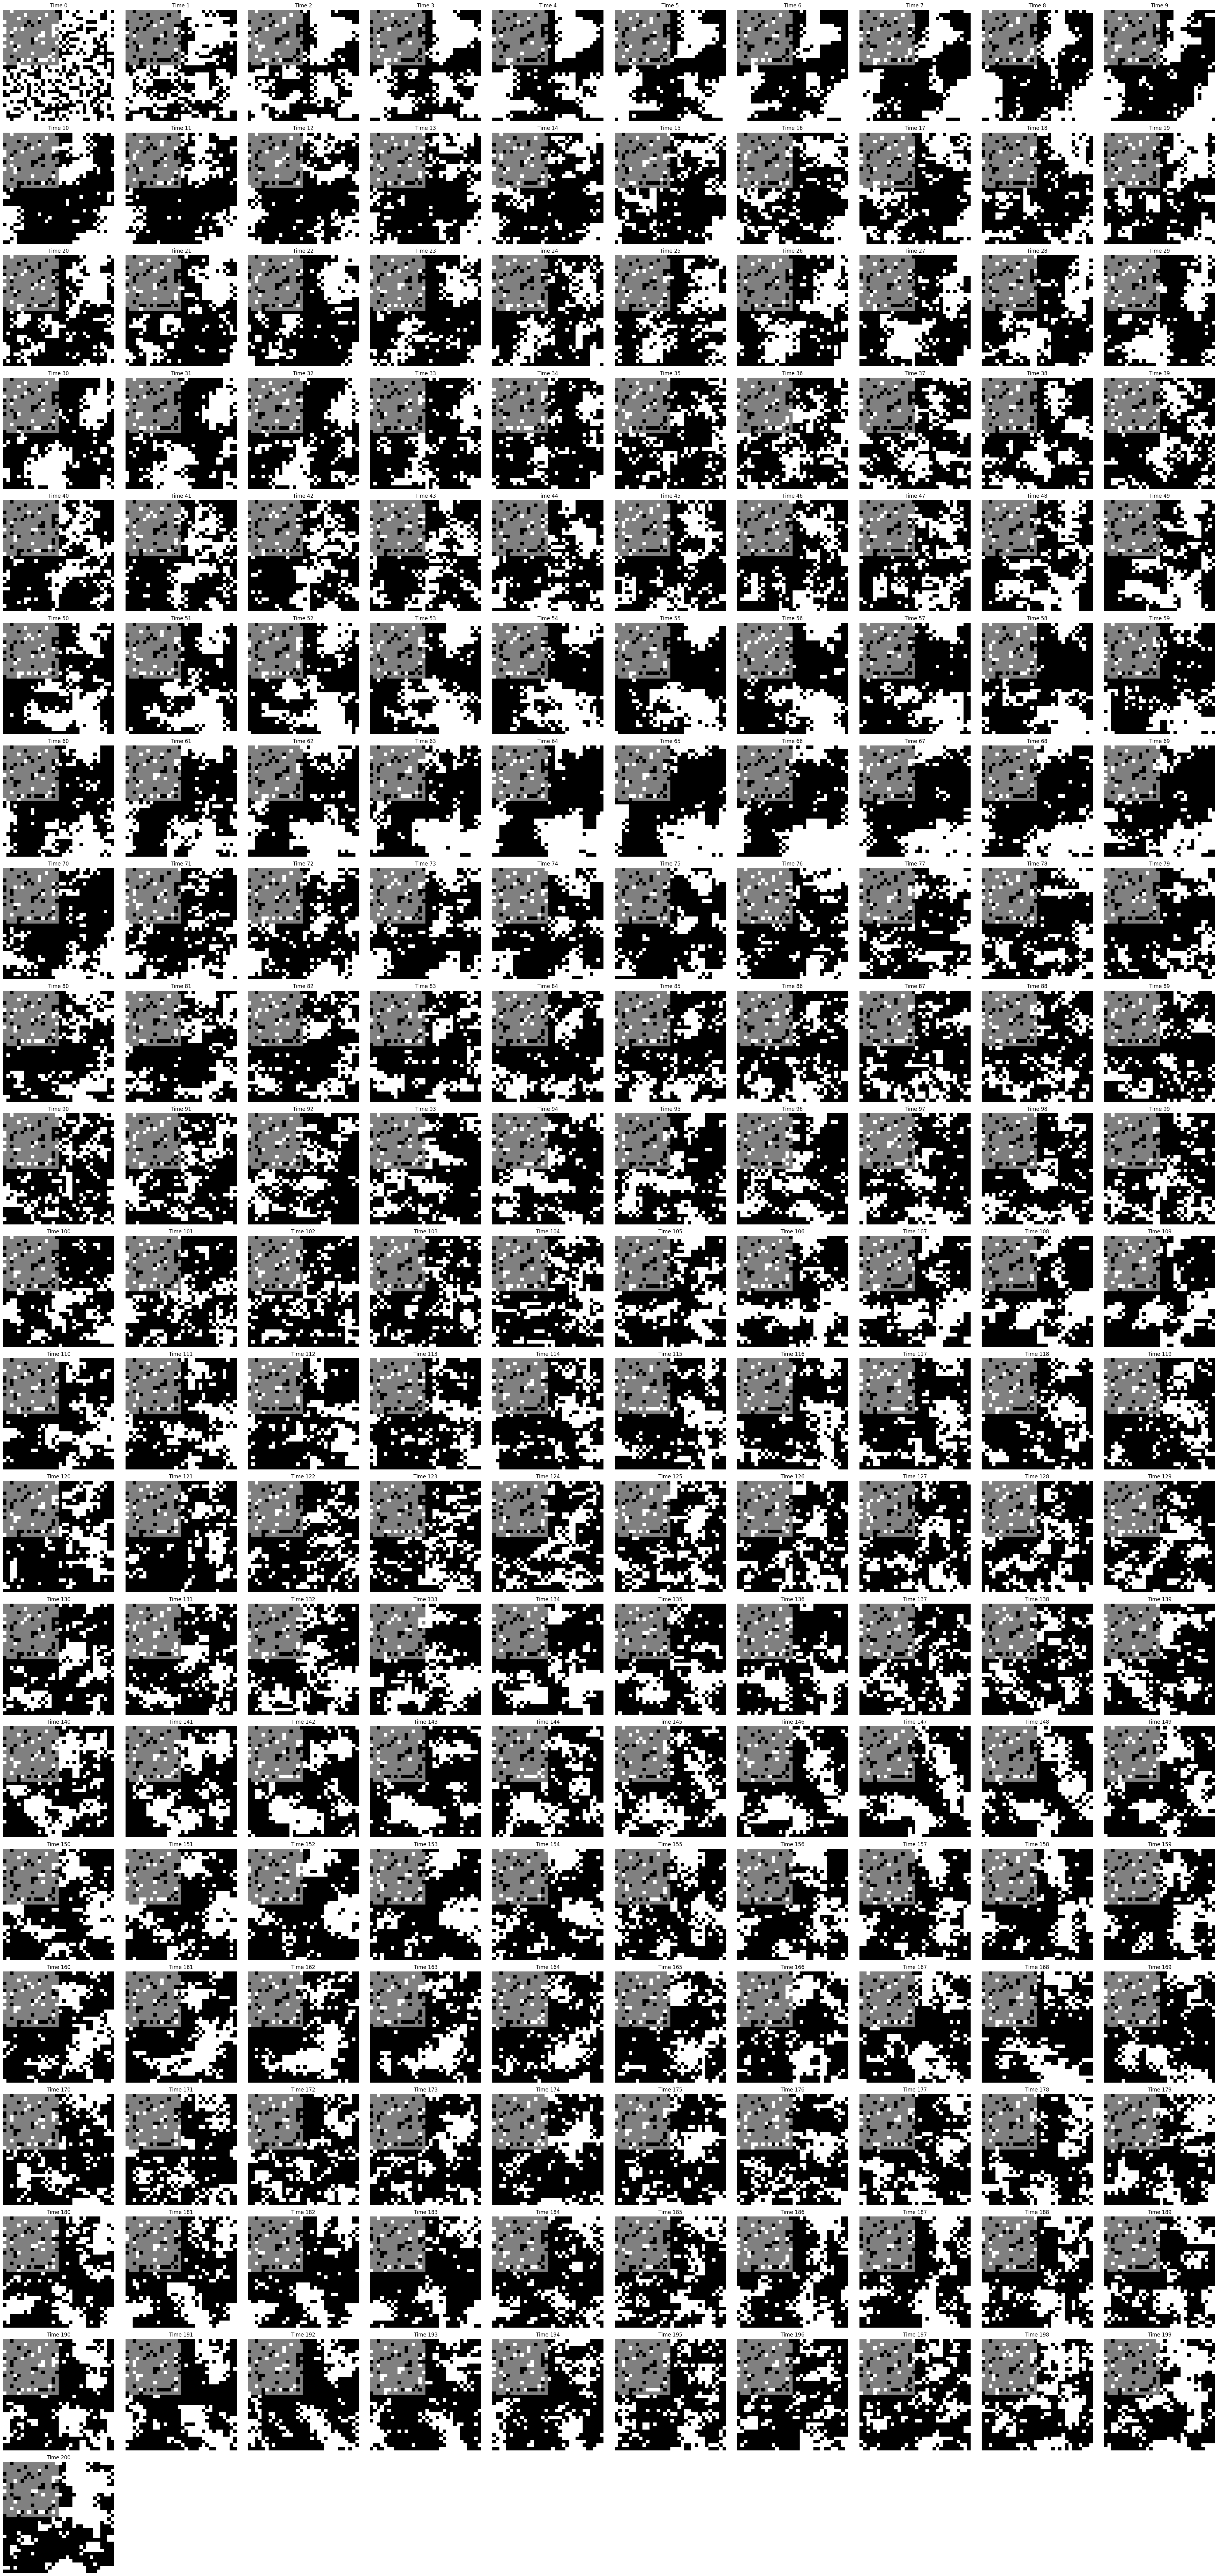

In [4]:
# Visualisation des résultats avec agents neutres (Noir = -1, Gris = 0, Blanc = +1)
plot_array_list(full_grids, max_cols=10)